# Statistical Foundation of Data Sciences – Practical 5

**Student:** Lavanya Garg  
**Course:** CSU1658 – Statistical Foundation of Data Sciences  
**Date:** October 14, 2025

---

## Assignment Overview

This notebook answers probability and hypothesis testing questions using the teachers' rating dataset, and applies a two-tailed z-test in a classic sports analytics context.


In [2]:
# Cell 1: Imports and Data Loading

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load teacher ratings data
df = pd.read_csv(r"C:\Users\lavan\Downloads\TeachingRatings.csv")

print(f"Rows: {df.shape[0]} | Columns: {df.shape[1]}")
display(df.head())


Rows: 463 | Columns: 13


,rownames,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof
0,1,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1
1,2,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2
2,3,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3
3,4,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4
4,5,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5


## Q1. What is the probability of receiving an evaluation score > 4.5?


In [11]:
# Cell 2: Q1 - Probability evaluation score > 4.5

if 'eval' in df.columns:
    n = len(df)
    count_above_45 = (df['eval'] > 4.5).sum()
    prob_above_45 = count_above_45 / n
    print(f"Probability of evaluation score > 4.5: {prob_above_45:.4f} ({count_above_45}/{n})")
else:
    print("'eval' column not found.")

Probability of evaluation score > 4.5: 0.1706 (79/463)


## Q2. What is the probability of an evaluation score > 3.5 and < 4.2?


In [13]:
# Cell 3: Q2 - Probability 3.5 < evaluation score < 4.2

if 'eval' in df.columns:
    count_in_range = ((df['eval'] > 3.5) & (df['eval'] < 4.2)).sum()
    prob_in_range = count_in_range / len(df)
    print(f"Probability of 3.5 < score < 4.2: {prob_in_range:.4f} ({count_in_range}/{len(df)})")
else:
    print("'eval' column not found.")


Probability of 3.5 < score < 4.2: 0.3542 (164/463)


## Q3. Two-Tailed Z-Test for Means (Sports Example)

#### Context:
- Population (pros): mean = 12, std = 5.5
- Sample (regional, n=36): mean = 10.7
- Test: Is regional mean different from pro mean?
- **Null Hypothesis:** The mean point of the regional players is equal to the historic mean (μ = 12)
- **Alternative Hypothesis:** The mean point of the regional players is different from the historic mean (μ ≠ 12)
- **Significance level (α):** 0.05


In [16]:
# Cell 4: Q3 - Two-Tailed Z-Test for given sports scenario

# Given values
mu_pro = 12         # Historic mean (population)
sigma_pro = 5.5     # Historic std dev (population)
n_regional = 36     # Sample size
mean_regional = 10.7 # Regional sample mean

# Standard error
se = sigma_pro / np.sqrt(n_regional)

# Z-score calculation
z = (mean_regional - mu_pro) / se

# Two-tailed p-value
p_value = 2 * (1 - norm.cdf(abs(z)))

print(f"Z-score: {z:.4f}")
print(f"Two-tailed p-value: {p_value:.4f}")

alpha = 0.05

if p_value < alpha:
    print(f"Result: Reject the null hypothesis at α={alpha}.")
    print("Interpretation: Regional players' mean IS SIGNIFICANTLY different from historic mean.")
else:
    print(f"Result: Fail to reject the null hypothesis at α={alpha}.")
    print("Interpretation: Regional players' mean is NOT significantly different from historic mean.")


Z-score: -1.4182
Two-tailed p-value: 0.1561
Result: Fail to reject the null hypothesis at α=0.05.
Interpretation: Regional players' mean is NOT significantly different from historic mean.


## Additional: Visualizing the Z-Test

Optional: Visualize the two-tailed test and significance regions.


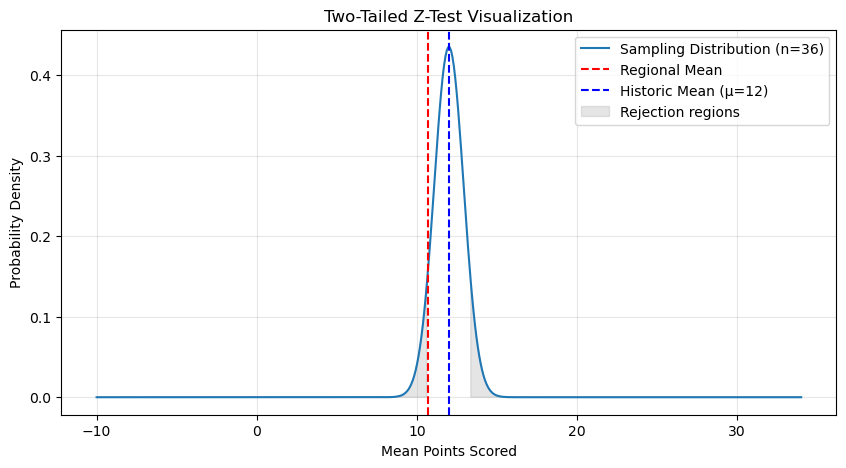

In [19]:
# Cell 5: Visualizing two-tailed test

import matplotlib.pyplot as plt

x = np.linspace(mu_pro - 4*sigma_pro, mu_pro + 4*sigma_pro, 500)
y = norm.pdf(x, mu_pro, sigma_pro/np.sqrt(n_regional))

plt.figure(figsize=(10,5))
plt.plot(x, y, label='Sampling Distribution (n=36)')
plt.axvline(mean_regional, color='red', linestyle='--', label='Regional Mean')
plt.axvline(mu_pro, color='blue', linestyle='--', label='Historic Mean (μ=12)')
plt.fill_between(x, y, where=(x < mu_pro - abs(mean_regional-mu_pro)) | (x > mu_pro + abs(mean_regional-mu_pro)),
                 color='gray', alpha=0.2, label='Rejection regions')
plt.title('Two-Tailed Z-Test Visualization')
plt.xlabel('Mean Points Scored')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
